In [22]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [23]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [24]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [25]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///resources/hawaii.sqlite")

In [26]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [27]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [28]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [29]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [30]:
# Find the most recent date in the data set.
most_recent_date_string = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date = dt.date(2017,8,23)
print(most_recent_date)

# Calculate the date 1 year ago from the last data point in the database
prior_year_date = most_recent_date - dt.timedelta(days=365)
prior_year_date
print(f"Start Date: {prior_year_date} and End Date: {most_recent_date}")

2017-08-23
Start Date: 2016-08-23 and End Date: 2017-08-23


In [31]:
# Perform a query to retrieve the data and precipitation scores
meas_date_prcp = (Measurement.date, Measurement.prcp)
precipitation_query = session.query(*meas_date_prcp).filter(Measurement.date >= prior_year_date).all()
precipitation_query

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [32]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation_query, columns = ['Date','Precipitation'])
precipitation_df.set_index('Date',inplace=True)
precipitation_df

,Precipitation
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [33]:
# Sort the dataframe by date
precipitation_df_sort = precipitation_df.sort_index()
precipitation_df_sort

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


Text(0.5, 1.0, 'Daily Precipitation from 2016-08-23 to 2017-08-23')

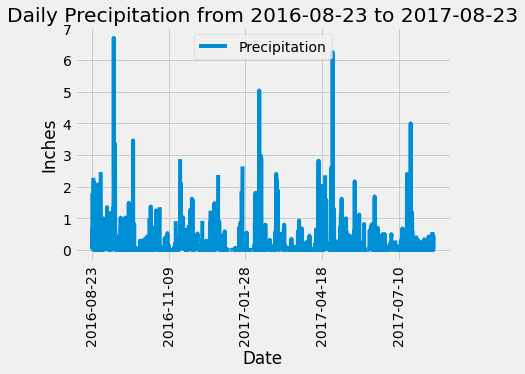

In [34]:
# Use Pandas Plotting with Matplotlib to plot the data
ax = precipitation_df_sort.plot(rot=90)
ax.set_ylabel('Inches')
ax.set_title(f"Daily Precipitation from {prior_year_date} to {most_recent_date}")

In [35]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df_sort.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [36]:
list_table_names = engine.table_names()
list_table_names

['measurement', 'station']

In [37]:
# Design a query to calculate the total number stations in the dataset
station_count  = session.query(Station.station).count()
print(f"There are {station_count} stations")

There are 9 stations


In [38]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
meas_station_table = [Measurement.station,func.count(Measurement.id)]
station_list = session.query(*meas_station_table).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).all()
station_list

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [39]:
station_top = session.query(*meas_station_table).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).first()
station_top

('USC00519281', 2772)

In [40]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs),\
              func.max(Measurement.tobs),\
              func.avg(Measurement.tobs)).\
    filter(Measurement.station == station_top[0]).all()

[(54.0, 85.0, 71.66378066378067)]

 title USC00519281 test


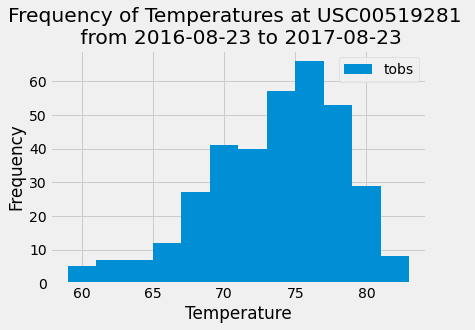

In [41]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_top_obs = session.query(Measurement.date, Measurement.tobs).\
                            filter(Measurement.station == station_top[0]).\
                            filter(Measurement.date >= prior_year_date).all()

station_top_obs_df = pd.DataFrame(station_top_obs)

station_top_obs_df.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.title(f"Frequency of Temperatures at {station_top[0]} \n from {prior_year_date} to {most_recent_date}")
print(f" title {station_top[0]} test")

# Close session

In [42]:
# Close Session
session.close()